In [1]:
!unzip /content/spotmentorlabs-machine-learning-assessment-dfe89675d80f.zip

Archive:  /content/spotmentorlabs-machine-learning-assessment-dfe89675d80f.zip
dfe89675d80f0bdb425c38a4e739bb33754d74bf
   creating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/
  inflating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/README.md  
  inflating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/YourName_PhoneNumber.ipynb  
   creating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/
   creating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/
  inflating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/5922081.json  
  inflating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/6523883.json  
  inflating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/6600981.json  
  inflating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/6686185.json  
  inflating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/6726409.json  
  infl

### Part I: Text Preprocessing

_Include all text preprocesing steps like processing of json,csv files & data cleaning in this part._

Tranforming data into simple CSV form

In [0]:
import pandas as pd
import json
import os

In [3]:
data = pd.read_csv('/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/document_departments.csv')
data.head(5)

,Document ID,Department
0,8196431,Customer service
1,8278123,Digital Marketing
2,8331625,Sales
3,8331003,Back office ticketing
4,8277939,Digital Marketing


In [4]:
data['Department'].value_counts()

Ticketing                          347
Sales                              270
Digital Marketing                  151
Customer service                    69
Marketing                           50
Finance                             42
Operations                          41
Administration                      38
Maintenance                         28
IT                                  20
Back office ticketing               18
Management Consulting               12
Presales                            10
Technology                          10
Analytics                            9
Engineering Design Construction      7
Recruitment                          6
Content                              6
Public Relations                     5
Airline Ground Operations            4
Logistics                            3
Marine Engineering                   3
Marine Deck                          2
Flight Operations                    2
Marine Service Steward               2
QA                       

In [5]:
dataset=[]
import json
for filename in os.listdir('/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs'):
  path='/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/'+filename
  print(path)
  f=open(path)
  d = json.load(f)
  f.close()
  dataset.append([int(d['_id']), d['jd_information']['description']])

/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/8278991.json
/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/8014080.json
/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/7930642.json
/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/7999510.json
/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/8022482.json
/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/8208777.json
/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/7922986.json
/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/8331687.json
/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/8072903.json
/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/8253293.json
/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/8280309.json
/content/spotmentorlabs-machine-

In [0]:
nd=[ent for ent in dataset if ent[1] != '']

In [7]:
len(nd)

745

In [0]:
df = pd.DataFrame(nd)

In [0]:
df.columns=['Document ID','decription']

In [10]:
df

,Document ID,decription
0,8278991,We have opening for&nbsp; Store Manager &nbsp;...
1,8208777,Deck Cadet Job Description. Be it on a militar...
2,8331687,Hiring for INTERNATIONAL BPO (call simran-9711...
3,8072903,We need candidates for part time /work from ho...
4,8253293,"Dear Candidate ,Greetings from ABM Travels &am..."
...,...,...
740,8305287,Job Description for Visa Assistant1. Candidate...
741,7889695,"Dear Candidates,Greetings !&nbsp;We are hiring..."
742,8388763,We are looking for a Tax Accountant to prepare...
743,8058909,Handle International Ticketing / Domestics Tic...


In [11]:
data

,Document ID,Department
0,8196431,Customer service
1,8278123,Digital Marketing
2,8331625,Sales
3,8331003,Back office ticketing
4,8277939,Digital Marketing
...,...,...
1157,8366382,Administration
1158,8370153,Sales
1159,8388313,Ticketing
1160,8389315,Sales


In [0]:
df_n = pd.merge(df,data, on='Document ID')

Our final data is ready in form of csv containing dependent and independent variable

In [0]:
df_n.head(10)

,Document ID,decription,Department
0,8097903,"Post: HELPER, DRIVER, SUPERVISOR, STORE KEEPER...",Engineering Design Construction
1,7967521,Need a Female For Travel CompanyJob Location -...,Customer service
2,7977827,"Dear Candidate,&nbsp;Pack N Go Holidays Pvt Lt...",Sales
3,8116051,TFG VACATIONS INDIA is a travel &amp; tourism ...,Digital Marketing
4,8278293,WE ARE HIRING FOR INTERNATIONAL BASED ORGANISA...,Customer service
5,8220411,We need committed &amp; result-oriented people...,Digital Marketing
6,7860764,Create &amp; Maintain relationship with existi...,Sales
7,7761203,TALENT HUNTERS MANPOWER SOLUTIONS HIRING FOR T...,Ticketing
8,7938859,Qualification: Degree or PGExperience : 8+ Yea...,Ticketing
9,7941367,FIT Specialist - Pune - Kalyani NagarAbout Com...,Marketing


In [0]:
df_n['Department'] = pd.Categorical(df_n['Department'])

In [0]:
dfDummies = pd.get_dummies(df_n['Department'], prefix = 'dept')

In [0]:
df_n = pd.concat([df_n, dfDummies], axis=1)

In [0]:
del df_n['Department']

In [0]:
df_n.shape

(745, 29)

In [0]:
df_n['text'] = df_n['decription'].apply(lambda x: x.replace('\n', ' '))

In [0]:
del df_n['decription']

In [0]:
df_n.columns

Index(['Document ID', 'dept_Administration', 'dept_Airline Ground Operations',
       'dept_Analytics', 'dept_Back office ticketing', 'dept_Content',
       'dept_Customer service', 'dept_Data entry', 'dept_Digital Marketing',
       'dept_Engineering Design Construction', 'dept_Finance',
       'dept_Flight Operations', 'dept_IT', 'dept_Learning and Development ',
       'dept_Logistics', 'dept_Maintenance', 'dept_Marine Deck ',
       'dept_Marine Engineering ', 'dept_Marine Service Steward ',
       'dept_Marketing', 'dept_Operations', 'dept_Presales ',
       'dept_Procurement', 'dept_Public Relations ', 'dept_Recruitment',
       'dept_Sales', 'dept_Technology', 'dept_Ticketing', 'text'],
      dtype='object')

In [0]:
df_n['labels'] = list(zip(df_n['dept_Administration'].tolist(), df_n['dept_Airline Ground Operations'].tolist(), df_n['dept_Analytics'].tolist(), df_n['dept_Back office ticketing'].tolist(), df_n['dept_Content'].tolist(), df_n['dept_Customer service'].tolist(), df_n['dept_Data entry'].tolist(), df_n['dept_Digital Marketing'].tolist(), df_n['dept_Engineering Design Construction'].tolist(), df_n['dept_Finance'].tolist(), df_n['dept_Flight Operations'].tolist(), df_n['dept_IT'].tolist(), df_n['dept_Learning and Development '].tolist(), df_n['dept_Logistics'].tolist(), df_n['dept_Maintenance'].tolist(), df_n['dept_Marine Deck '].tolist(), df_n['dept_Marine Engineering '].tolist(), df_n['dept_Marine Service Steward '].tolist(), df_n['dept_Marketing'].tolist(), df_n['dept_Operations'].tolist(), df_n['dept_Presales '].tolist(), df_n['dept_Procurement'].tolist(), df_n['dept_Public Relations '].tolist(), df_n['dept_Recruitment'].tolist(), df_n['dept_Sales'].tolist(), df_n['dept_Technology'].tolist(), df_n['dept_Ticketing'].tolist()))

In [0]:
df_n=df_n[['text','labels']]

In [0]:
df_n.head(5)

,text,labels
0,"Post: HELPER, DRIVER, SUPERVISOR, STORE KEEPER...","(0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,Need a Female For Travel CompanyJob Location -...,"(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"Dear Candidate,&nbsp;Pack N Go Holidays Pvt Lt...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,TFG VACATIONS INDIA is a travel &amp; tourism ...,"(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,WE ARE HIRING FOR INTERNATIONAL BASED ORGANISA...,"(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [0]:
from sklearn.model_selection import train_test_split
train_df, eval_df = train_test_split(df_n, test_size=0.1)

Using simple Tranfromer library for testing using BERT 

In [0]:
!pip install simpletransformers

     |████████████████████████████████| 133kB 7.3MB/s 
     |████████████████████████████████| 204kB 42.6MB/s 
     |████████████████████████████████| 501kB 50.0MB/s 
     |████████████████████████████████| 1.0MB 49.6MB/s 
     |████████████████████████████████| 870kB 45.7MB/s 
     |████████████████████████████████| 3.7MB 38.0MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=eb1a8ff41f3a95c09b391d991c15c5fe49f328a591557de89fd5727dd56540f7
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=8443b875d715770b0409eba07ce38bdc272458fa00a1873cd5a95ea02bd4baf6
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built seqeval sacremoses


In [0]:
import torch
torch.cuda.is_available()

True

In [0]:
from simpletransformers.classification import MultiLabelClassificationModel
model = MultiLabelClassificationModel('bert', 'bert-base-uncased', use_cuda=False, num_labels=27, args={'train_batch_size':2, 'reprocess_input_data': True, 'learning_rate': 3e-5, 'num_train_epochs': 3, 'max_seq_length': 256})

In [0]:
# Train the model
model.train_model(train_df)

Converting to features started. Cache is not used.


Running loss: 0.429661

Running loss: 0.341478

Running loss: 0.321669

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.301395
Training of bert model complete. Saved to outputs/.


In [0]:
import sklearn
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

In [0]:
print(model_outputs)

[[0.18506317 0.21530199 0.21496257 ... 0.30322924 0.20977381 0.32957333]
 [0.18647204 0.21525785 0.21405585 ... 0.30362457 0.21082062 0.32823393]
 [0.18342903 0.21373513 0.21563014 ... 0.3034069  0.21033795 0.32830018]
 ...
 [0.1855273  0.20540793 0.22337574 ... 0.2996657  0.20913835 0.34062517]
 [0.18243636 0.207848   0.22006729 ... 0.303682   0.2116793  0.32624543]
 [0.18558022 0.21511021 0.21516465 ... 0.30628487 0.20859876 0.33253583]]


In [0]:
result

{'LRAP': 0.3926481144103301, 'eval_loss': 0.30357639491558075}

Constructing my own neural network architecture to test performance

In [0]:
#tring to make my own neural architecture
import sys, os, re, csv, codecs, numpy as np, pandas as pd

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, BatchNormalization, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split

In [0]:
df_n2 = pd.merge(df,data, on='Document ID')

In [80]:
df_n2

,Document ID,decription,Department
0,8278991,We have opening for&nbsp; Store Manager &nbsp;...,Sales
1,8208777,Deck Cadet Job Description. Be it on a militar...,Marine Engineering
2,8331687,Hiring for INTERNATIONAL BPO (call simran-9711...,Customer service
3,8072903,We need candidates for part time /work from ho...,Digital Marketing
4,8253293,"Dear Candidate ,Greetings from ABM Travels &am...",Ticketing
...,...,...,...
740,8305287,Job Description for Visa Assistant1. Candidate...,Customer service
741,7889695,"Dear Candidates,Greetings !&nbsp;We are hiring...",Sales
742,8388763,We are looking for a Tax Accountant to prepare...,Ticketing
743,8058909,Handle International Ticketing / Domestics Tic...,Ticketing


In [0]:
def normalize(s):
    s = s.lower()
    # Isolate punctuation
    s = re.sub(r'([\'\"\.\(\)\!\?\-\\\/\,])', r' \1 ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    s = s.replace('nbsp', '')
    s = re.sub(" \d+", " ", s)
    return s

In [82]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
train_norm_text=[]
for line in df_n2['decription'].values:
    line=str(line)
    line = normalize(line)
    line = line.lower()
    line_by_words = re.findall(r'(?:\w+)', line, flags = re.UNICODE) # remove punctuation ans split
    new_line=[]
    for word in line_by_words:
        if word not in stop:
            new_line.append(word)
    train_norm_text.append(" ".join(new_line))

In [0]:
df_n2['decription']=train_norm_text

In [85]:
df_n2.head()

,Document ID,decription,Department
0,8278991,opening store manager kindly find job details ...,Sales
1,8208777,deck cadet job description military vessel lux...,Marine Engineering
2,8331687,hiring international bpo call simran prashant ...,Customer service
3,8072903,need candidates part time work home spend hrs ...,Digital Marketing
4,8253293,dear candidate greetings abm travels amp tours...,Ticketing


In [86]:
train = pd.get_dummies(df_n2, columns = ["Department"])
train.head()

,Document ID,decription,Department_Administration,Department_Airline Ground Operations,Department_Analytics,Department_Back office ticketing,Department_Content,Department_Customer service,Department_Data entry,Department_Digital Marketing,Department_Engineering Design Construction,Department_Finance,Department_Flight Operations,Department_IT,Department_Learning and Development,Department_Logistics,Department_Maintenance,Department_Marine Deck,Department_Marine Engineering,Department_Marine Service Steward,Department_Marketing,Department_Operations,Department_Presales,Department_Procurement,Department_Public Relations,Department_Recruitment,Department_Sales,Department_Technology,Department_Ticketing
0,8278991,opening store manager kindly find job details ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,8208777,deck cadet job description military vessel lux...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,8331687,hiring international bpo call simran prashant ...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8072903,need candidates part time work home spend hrs ...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8253293,dear candidate greetings abm travels amp tours...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [87]:
train.shape

(745, 29)

In [88]:
train.columns

Index(['Document ID', 'decription', 'Department_Administration',
       'Department_Airline Ground Operations', 'Department_Analytics',
       'Department_Back office ticketing', 'Department_Content',
       'Department_Customer service', 'Department_Data entry',
       'Department_Digital Marketing',
       'Department_Engineering Design Construction', 'Department_Finance',
       'Department_Flight Operations', 'Department_IT',
       'Department_Learning and Development ', 'Department_Logistics',
       'Department_Maintenance', 'Department_Marine Deck ',
       'Department_Marine Engineering ', 'Department_Marine Service Steward ',
       'Department_Marketing', 'Department_Operations', 'Department_Presales ',
       'Department_Procurement', 'Department_Public Relations ',
       'Department_Recruitment', 'Department_Sales', 'Department_Technology',
       'Department_Ticketing'],
      dtype='object')

In [0]:
X=train['decription'].values

In [90]:
len(X)

745

In [0]:
list_classes = ['Department_Administration', 'Department_Airline Ground Operations', 'Department_Analytics', 'Department_Back office ticketing', 'Department_Content', 'Department_Customer service', 'Department_Data entry', 'Department_Digital Marketing', 'Department_Engineering Design Construction', 'Department_Finance', 'Department_Flight Operations', 'Department_IT', 'Department_Learning and Development ', 'Department_Logistics', 'Department_Maintenance', 'Department_Marine Deck ', 'Department_Marine Engineering ', 'Department_Marine Service Steward ', 'Department_Marketing', 'Department_Operations', 'Department_Presales ', 'Department_Procurement', 'Department_Public Relations ', 'Department_Recruitment', 'Department_Sales', 'Department_Technology', 'Department_Ticketing']
y = train[list_classes].values

In [92]:
len(y)

745

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [94]:
X_train.shape

(670,)

In [95]:
y_train.shape

(670, 27)

In [0]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [52]:
!wget https://www.floydhub.com/api/v1/resources/Av2ThePYtAHXMAuSXEBV8X/glove.6B.100d.txt?content=true&rename=glove6b100dtxt


--2020-03-05 11:58:02--  https://www.floydhub.com/api/v1/resources/Av2ThePYtAHXMAuSXEBV8X/glove.6B.100d.txt?content=true
Resolving www.floydhub.com (www.floydhub.com)... 104.26.1.30, 104.26.0.30, 2606:4700:20::681a:1e, ...
Connecting to www.floydhub.com (www.floydhub.com)|104.26.1.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘glove.6B.100d.txt?content=true’

glove.6B.100d.txt?c     [     <=>            ] 331.04M  11.6MB/s    in 29s     

2020-03-05 11:58:33 (11.2 MB/s) - ‘glove.6B.100d.txt?content=true’ saved [347116733]



Using 100 dimensional pretrained glove

In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/glove.6B.100d.txt?content=true', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(27, activation='softmax')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [124]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, None, 100)         539600    
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 128)         64128     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               91600     
_________________________________________________________________
dense_21 (Dense)             (None, 27)                2727      
Total params: 698,055
Trainable params: 158,455
Non-trainable params: 539,600
_________________________________________________________________
None


In [126]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_split=0.2)

Train on 536 samples, validate on 134 samples
Epoch 1/20
536/536 [==============================] - 2s 4ms/step - loss: 1.6873 - acc: 0.5000 - val_loss: 1.7411 - val_acc: 0.4552
Epoch 2/20
536/536 [==============================] - 2s 4ms/step - loss: 1.7036 - acc: 0.4907 - val_loss: 1.7636 - val_acc: 0.4403
Epoch 3/20
536/536 [==============================] - 2s 5ms/step - loss: 1.6678 - acc: 0.5019 - val_loss: 1.7327 - val_acc: 0.4552
Epoch 4/20
536/536 [==============================] - 2s 5ms/step - loss: 1.6605 - acc: 0.5019 - val_loss: 1.8301 - val_acc: 0.4179
Epoch 5/20
536/536 [==============================] - 2s 5ms/step - loss: 2.1051 - acc: 0.3414 - val_loss: 2.0317 - val_acc: 0.3955
Epoch 6/20
536/536 [==============================] - 3s 5ms/step - loss: 1.9389 - acc: 0.4328 - val_loss: 1.9202 - val_acc: 0.4179
Epoch 7/20
536/536 [==============================] - 2s 4ms/step - loss: 1.8879 - acc: 0.4515 - val_loss: 1.8664 - val_acc: 0.4328
Epoch 8/20
536/536 [==========

In [127]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

75/75 [==============================] - 0s 1ms/step
Test Score: 1.850233057339986
Test Accuracy: 0.45333333532015485


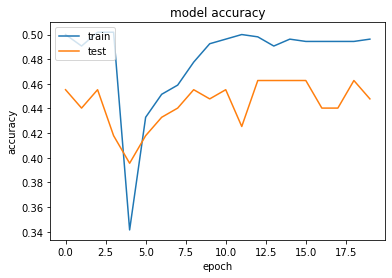

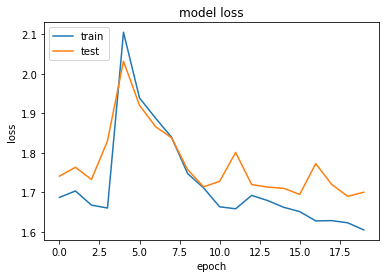

In [128]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

**Results Summary:**
_Provide a brief summary of results obtained like model accuracy & other insights based on EDA & your interpretations_

1. The dataset is small. As it is told that we can only use the value of description field inside the jd_information field, the data gets even more reduced because lot of cases had empty description
2. In my work, I have shown how I go about first compiling the data in easy comprehensible format and then working upon feature extraction which is followed by training.
3. I have shown 2 ways i.e. using fine tuning the data on the pretrained BERT model and 2nd using simple CNN+LSTM network. Though I have not focussed on getting high accuracy because the dataset is highly unbalanced and is also small. My focus is how I can convert the data into simpler format so that it is easily understood by the machines. Fruther I have tried different latest approaches to extract features from the text that take semantic and contextual knowlegde into consideration.
4. Further, I can work on optimising the model even more by exploring latest research and implementing them here for the good of our comapany.